# Simple Linear Regression

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate random heights (in cm) between 140 and 200
heights = np.random.randint(140, 200, 100)

# Generate weights using a linear formula with some noise
weights = np.round(0.5 * heights + np.random.normal(0, 5, 100), 2)  # Adding normal noise

# Create a DataFrame
df = pd.DataFrame({'Height(cm)': heights, 'Weight(kg)': weights})

# Save as CSV
# df.to_csv("./data/height_weight_data.csv", index=False)


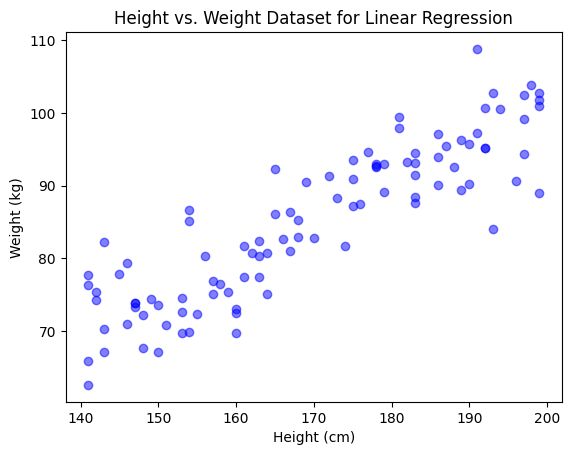

In [28]:
# Plot the dataset
plt.scatter(df["Height(cm)"], df["Weight(kg)"], color="blue", alpha=0.5)
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight Dataset for Linear Regression")
plt.show()

In [29]:
# Divided out detaset into dependent and independent features
X = df[['Height(cm)']]
y = df['Weight(kg)']

In [30]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Standardization the data cause we want to reduce the diff between min and max value for evalute our GD's best performance or quickly
# Every algorithm don't need to standardization
# First fit calculate the mean and sd then,
# transform apply z-score on every data point

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
# For pretend data leackage we don't use fir_transform
X_test = scaler.transform(X_test)
# y_train_scaler = scaler.transform(y_train)

In [32]:
X_train, X_test

(array([[ 0.43810657],
        [-0.11470929],
        [-1.60731211],
        [-0.8886515 ],
        [ 0.88035926],
        [ 0.27226181],
        [ 1.59901988],
        [-0.00414612],
        [-0.66752515],
        [ 0.7145145 ],
        [-1.10977784],
        [ 1.15676719],
        [ 0.60395133],
        [-0.55696198],
        [-1.16505943],
        [-1.2756226 ],
        [-1.60731211],
        [ 1.21204877],
        [ 0.99092243],
        [ 0.49338816],
        [-1.55203053],
        [-0.33583564],
        [ 0.43810657],
        [-0.94393308],
        [ 1.59901988],
        [-0.50168039],
        [-1.49674894],
        [ 0.38282498],
        [ 1.4884567 ],
        [-0.39111722],
        [-0.05942771],
        [-0.8886515 ],
        [-0.39111722],
        [ 0.60395133],
        [ 1.4884567 ],
        [ 0.27226181],
        [-0.55696198],
        [-0.28055405],
        [-0.22527246],
        [-0.72280674],
        [-0.72280674],
        [-1.2756226 ],
        [-1.22034101],
        [ 0

In [33]:
# Train out model
from sklearn.linear_model import LinearRegression
regression = LinearRegression(
    n_jobs=-1, 
    fit_intercept=True
)
regression.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [46]:
regression.coef_, regression.intercept_

(array([9.54602359]), np.float64(85.27349999999998))

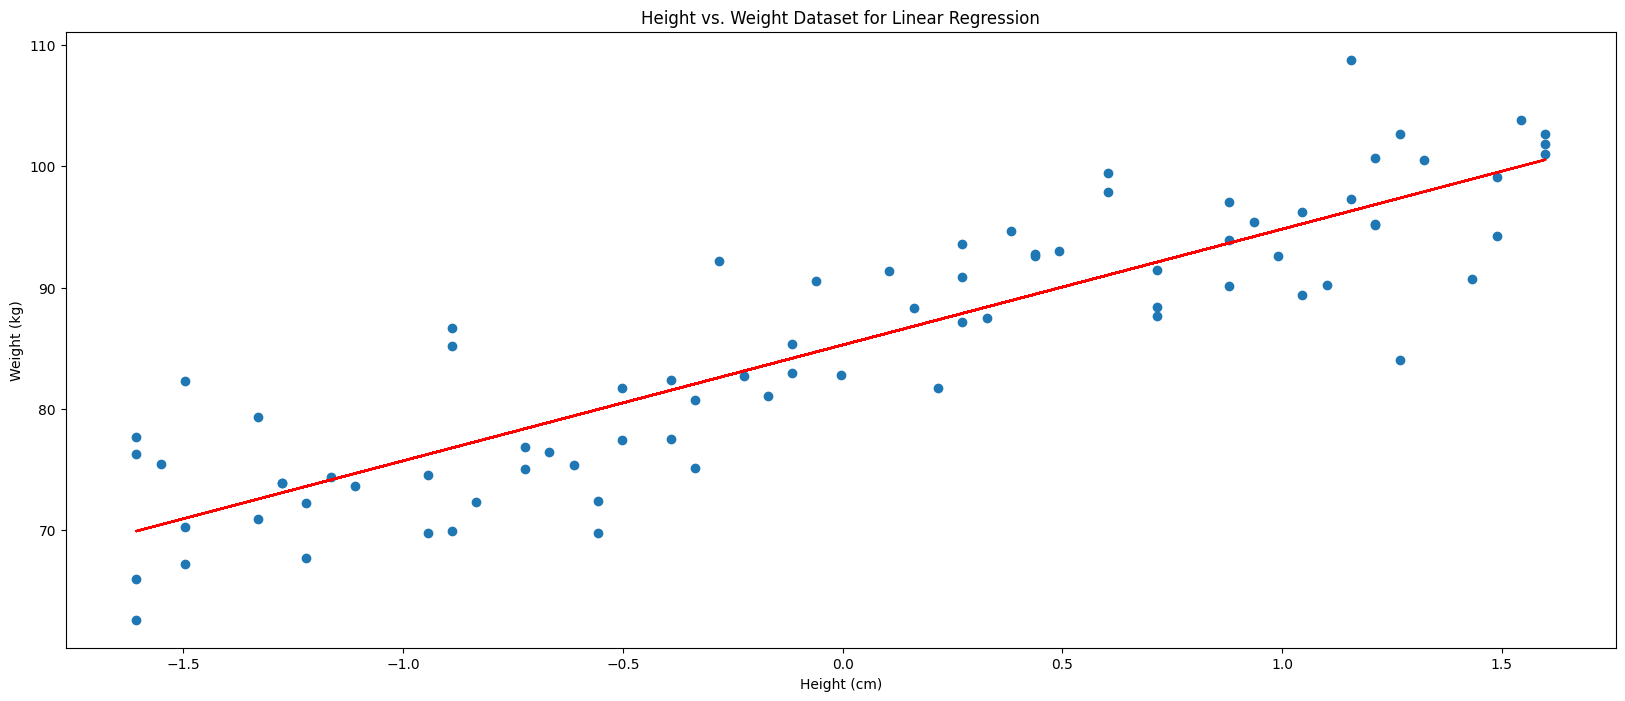

In [45]:
plt.figure(figsize=(20, 8))
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), 'r')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight Dataset for Linear Regression")
plt.show()

## Prediction on train data
1. Predict Weight = intercept + coef_(Heights)
2. y_pred train = 85.2734 + 9.54602359(X_train)

## Prediction on test data
1. Predict Weight = intercept + coef_(heights)
2. y_pred train = 85.2734 + 9.54602359(X_test)

In [47]:
y_pred_test = regression.predict(X_test)

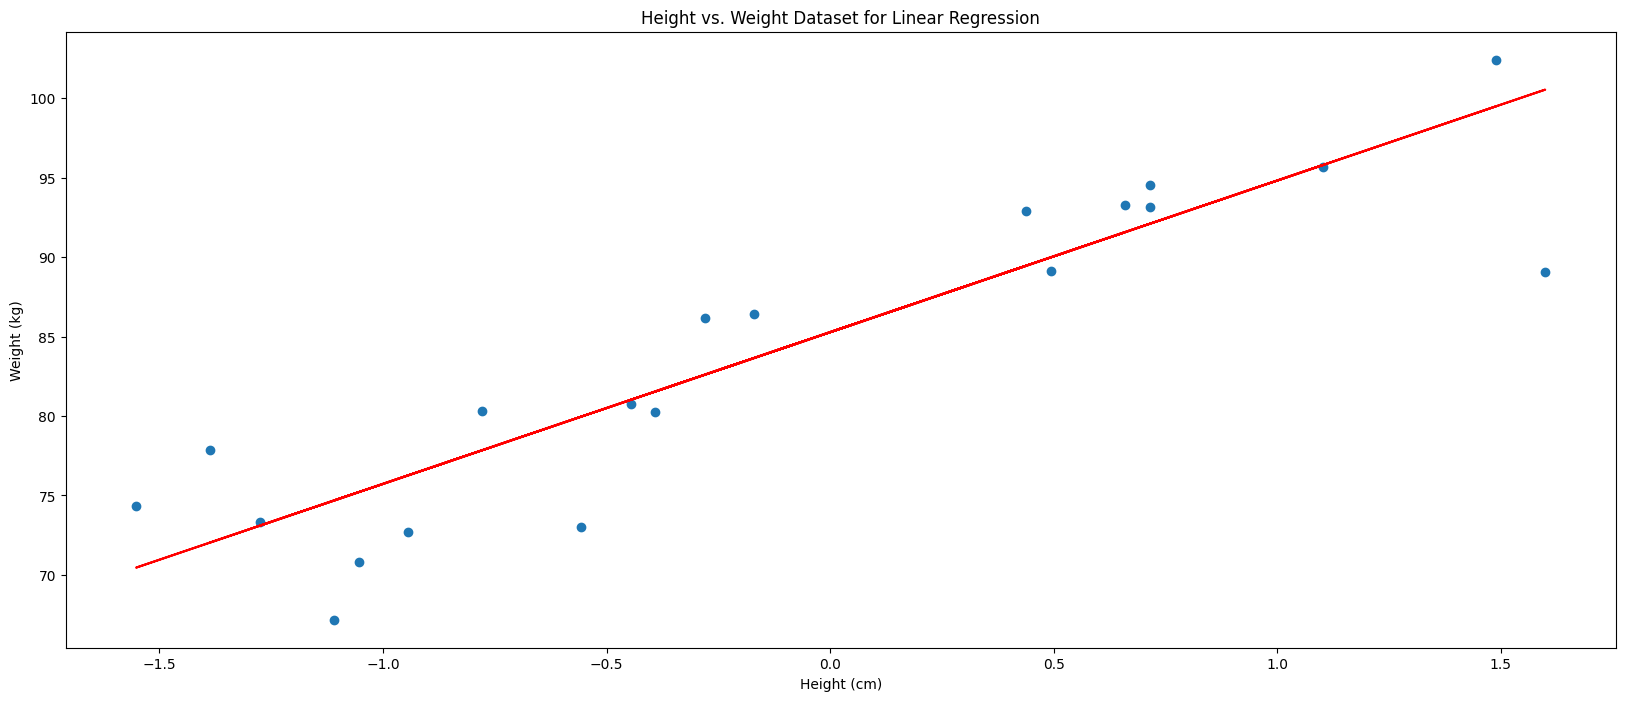

In [54]:
y_pred_test, y_test
plt.figure(figsize=(20, 8))
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_test, 'r')
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.title("Height vs. Weight Dataset for Linear Regression")
plt.show()

In [56]:
# Performance Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = root_mean_squared_error(y_test, y_pred_test)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MSE: 18.814090888121935
MAE: 3.3333798273711652
RMSE: 4.337521283881145


In [57]:
# Fromula for r-square = 1-[(1-R2) * (n-1) / (n-k-1)]
# n = number of observation
# k = number of predict variables

accuracy = r2_score(y_test, y_pred_test)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8003036286385298


In [67]:
height = scaler.transform([[165.09999999999997]])
height

e:\ML-Bootcamp-Practical\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.27502589]])

In [76]:
regression.predict(height)

array([82.64809636])

# Assumption
1 : Plots
- plot a scatter plot for the prediction
- plt.scatter(y_test, y_pred_test)

2 : Residuals
- residuals = y_test - y_pred_test

3 : Scatter plots using residuals and prediction

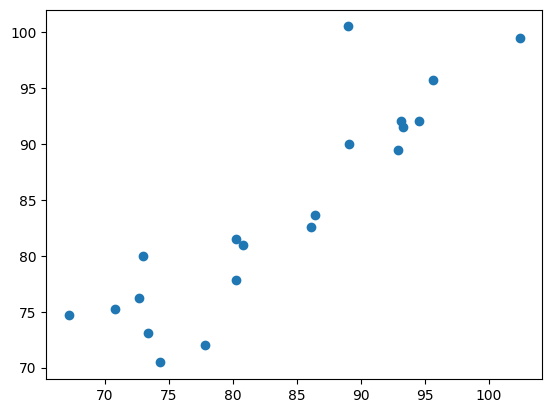

In [78]:
plt.scatter(y_test, y_pred_test)

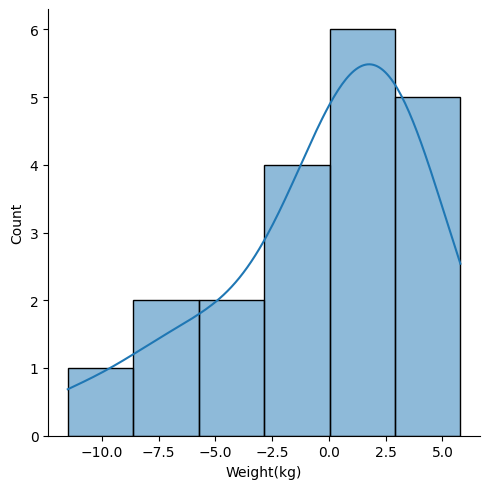

In [82]:
residuals = y_test - y_pred_test
residuals
# plot this residual
import seaborn as sns
sns.displot(residuals, kde=True)

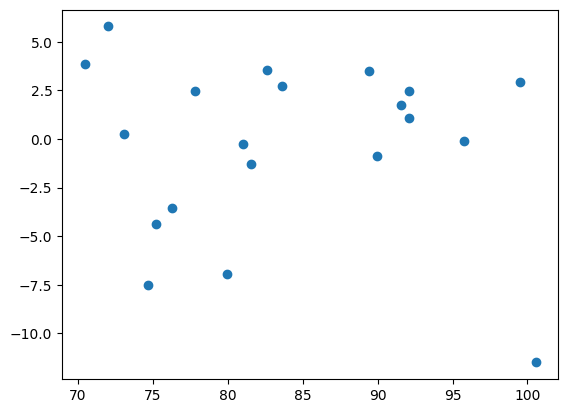

In [83]:
plt.scatter(y_pred_test, residuals)
# uniform distribution

In [84]:
# Create a pickle file or pickling the model for deploy this model